<a href="https://colab.research.google.com/github/ValeriaSalinasB/Visualizacion-datos/blob/main/Actividad9_VisDatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Nutritional information of different types of food

In [185]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [186]:
path='/content/drive/MyDrive/sampledatafoodinfo.xlsx'

In [187]:
df=pd.read_excel(path,
                 sheet_name='FoodList')
df

,Category,Food Item,Measure,Calories,Protein,Fat,Carbs,Fibre,Unnamed: 8,"Note: Protein, Fat, Carbs, Fibre, are measured in grams"
0,Baked Goods,"Angelfood, commercial (25cm diam)",1/12,73,2.0,NaN,16.0,0.4,NaN,NaN
1,Baked Goods,"Angelfood, from mix (25cm diam)",1/12,129,3.0,NaN,29.0,0.1,NaN,NaN
2,Baked Goods,"Animal crackers (arrowroot, social tea)",2,45,1.0,1.0,7.0,0.2,NaN,NaN
3,Baked Goods,"Apple crisp, homemade",125mL,206,2.0,4.0,39.0,1.8,NaN,NaN
4,Baked Goods,"Apple, commercial, 2 crust (23cm diam)",1/8,296,2.0,14.0,43.0,2.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1089,Vegetables,"Vegetables, broccoli and cauliflower, frozen, ...",125mL,22,2.0,NaN,4.0,2.4,NaN,NaN
1090,Vegetables,"Vegetables, mixed (corn, lima beans, snap bean...",125mL,63,3.0,NaN,13.0,2.8,NaN,NaN
1091,Vegetables,"Vegetables, peas and carrots, canned, not drained",125mL,51,3.0,NaN,11.0,2.7,NaN,NaN
1092,Vegetables,"Zucchini, raw, slices",4,6,NaN,NaN,1.0,0.4,NaN,NaN


#Description of data sets

There's 7 columns of data that are going to be used in this analisis, this data set categorizes different foods in groups and lists the amount of calories, protein, fat, carbs and, fibre in a set amount of that food. 

In [188]:
df.columns

Index(['Category', 'Food Item', 'Measure', 'Calories', 'Protein', 'Fat',
       'Carbs', 'Fibre', 'Unnamed: 8',
       'Note: Protein, Fat, Carbs, Fibre, are measured in grams'],
      dtype='object')

In [189]:
df.rename(columns={})
to_be_dropped=['Note: Protein, Fat, Carbs, Fibre, are measured in grams','Unnamed: 8']

In [190]:
df.drop(to_be_dropped,
        axis=1,
        inplace=True)

In [191]:
df.head(2)

,Category,Food Item,Measure,Calories,Protein,Fat,Carbs,Fibre
0,Baked Goods,"Angelfood, commercial (25cm diam)",1/12,73,2.0,NaN,16.0,0.4
1,Baked Goods,"Angelfood, from mix (25cm diam)",1/12,129,3.0,NaN,29.0,0.1


#Description of the variable of interest


1.    Category: Categorical variable, states the type of food it is.
2.  Food Item: Categorical variable, specifies what food it is.
3. Measure: Numerical variable, represents the amount of food measured.
4. Calories: Numerical variable, amount of calories the food in question has.
5. Protein: Numerical variable, amount of protein the food in question has.
6. Carbs: Numerical variable, amount of carbohydrates the food in question has.
7. Fibre: Numerical variable, amount of fibre the food in question has.




# 1. Which category of foods has the most amount of calories?

#Hipothesis 
Thanks to the variable category and calories we will be able to graph the amounts in grams of calories a certain category of foods has, this will give us a visual represantation of the amounts and most likely will give us an outright answer for the question "Which category of foods has the most amount of calories?" in the form of the bar that is bigger in magnitude.

In [192]:
df['Total']=df.iloc[:,3:].sum(axis=1)
df.head(2)

,Category,Food Item,Measure,Calories,Protein,Fat,Carbs,Fibre,Total
0,Baked Goods,"Angelfood, commercial (25cm diam)",1/12,73,2.0,NaN,16.0,0.4,91.4
1,Baked Goods,"Angelfood, from mix (25cm diam)",1/12,129,3.0,NaN,29.0,0.1,161.1


Text(0.5, 1.0, 'Calories (gr) per food category')

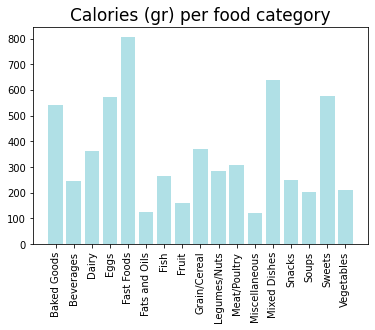

In [193]:
category=df['Category']
calories=df['Calories']
plt.bar(category, calories, color='powderblue')
plt.xticks(rotation=90)
plt.title('Calories (gr) per food category', fontsize=17)

#Conclusion

We can see thanks to the bar graph that the types of food that have the most amount of calories in grams are Fast Food, Mixed Dishes, Sweets and Eggs, and Baked Goods respectively, with Fast Food taking the lead for more than 150 grams.

#2. Which is the macronutrient that is most present in fast food?

#Hypothesis
Utilizing the variables Category, Protein, Fat,Carbs and, Fibre we will be able to do a pivot table which will then be used to calculate in percentage each of the macronutrients for Fast Food. This will be the data used to do a graph, most likely a pie chart, to represent visually the amounts and help identify the macronutrient that has the most quantity.

In [194]:
import plotly.express as px

In [195]:
PVT=pd.pivot_table(index='Category',aggfunc='mean',data=df,values= ['Protein', 'Fat','Carbs','Fibre'],margins=True)
PVT.loc['Total']=PVT.sum()
PVT

,Carbs,Fat,Fibre,Protein
Category,,,,
Baked Goods,31.877778,9.625000,1.124444,3.077778
Beverages,16.630435,1.000000,0.060417,0.741935
Dairy,13.469136,3.225581,6.025974,6.987342
Eggs,7.222222,14.272727,NaN,12.818182
Fast Foods,28.146341,15.951220,1.792683,17.243902
Fats and Oils,1.344828,7.358974,NaN,0.125000
Fish,2.066667,4.254237,NaN,15.573770
Fruit,14.726027,4.000000,1.469863,0.980392
Grain/Cereal,24.371212,2.200000,2.290152,3.621212


In [196]:
PvPie=PVT.loc['Fast Foods']/PVT.loc['Total']*100
PvPie

Carbs      10.482813
Fat        12.313963
Fibre       5.879308
Protein    13.568943
dtype: float64

Text(0.5, 1.0, 'Percentage of macronutrients in Fast Food')

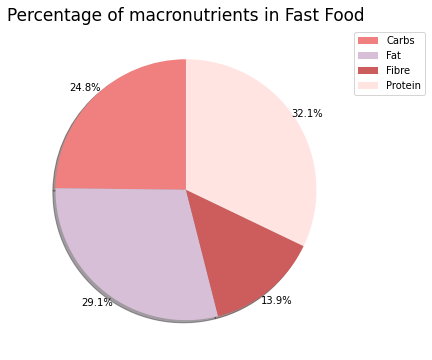

In [197]:
colors=['lightcoral','thistle','indianred','mistyrose','palevioletred']
PvPie.plot(kind='pie',
                     figsize=(15,6),
           label=" ",
           labels=None,
                     startangle=90,
                     autopct='%1.1f%%',
                     pctdistance=1.1,
                     shadow=True,
           colors=colors)
plt.legend(labels=PVT,bbox_to_anchor=(1,1.0))
plt.title('Percentage of macronutrients in Fast Food', fontsize=17)

#Conclusion
Taking the type of food that has the most calories, Fast Food, and arranging information of the Carbs, Fat, Fibre and, Protein in this type of food in a pie chart, we can observe that Fast Food has almost the same amount of Protein and Fat with only a 3% difference. Carbs come in third with only 24.8% and lastly Fibre with only 13.9%.

#3. Which fast food has the most fat?


#Hypothesis
Thanks to the variables Category, Food Item and, Fat, it is most likely that by organizing the information in a pivot table, sorting it to get the values of fat from the biggest to smallest and then thanks to a horizontal bar chart we will be able to appreciate visually the answer to the question "Which fast food has the most fat?".

In [198]:
PVFF=pd.pivot_table(index=['Category','Food Item'],data=df,values= 'Fat',margins=True)
PVFF

Fat
Category    Food Item                                                    
Baked Goods Animal crackers (arrowroot, social tea)              1.000000
            Apple crisp, homemade                                4.000000
            Apple, commercial, 2 crust (23cm diam)              14.000000
            Apple, homemade, 2 crust (23cm diam)                19.000000
            Banana bread, homemade (11cm X 6cm X 1cm)            6.000000
...                                                                   ...
Vegetables  Potatoes, mashed, homemade with 2% milk and mar...   4.000000
            Potatoes, scalloped, from mix with water, with ...   5.000000
            Potatoes, scalloped, homemade                        5.000000
            Tomato sauce for spaghetti, canned                   6.000000
All                                                              7.010439

[844 rows x 1 columns]

In [199]:
PVF=PVFF.loc['Fast Foods']
PVF
PVF=PVF.sort_values('Fat', ascending=False)
PVF

,Fat
Food Item,
General Tao/Tso chicken,62.0
"Chicken sandwich, breaded chicken + condiments + vegetables",39.0
"Cheeseburger, double patty + condiments + vegetables",35.0
"Hamburger, double patty + condiments",32.0
"Breakfast biscuit with egg, cheese and bacon",31.0
Fish sandwich with breaded fish,29.0
"Submarine sandwich (6 inches), with tuna",28.0
"Wrap sandwich, chicken ranch",25.0
"Veggie burger, single patty + condiments + vegetables",19.0


In [200]:
PVF=PVF[:10]
PVF=PVF.sort_values('Fat', ascending=True)
PVF

,Fat
Food Item,
"Veggie burger, single patty + condiments + vegetables",19.0
"Submarine sandwich (6 inches), with cold cuts",19.0
"Wrap sandwich, chicken ranch",25.0
"Submarine sandwich (6 inches), with tuna",28.0
Fish sandwich with breaded fish,29.0
"Breakfast biscuit with egg, cheese and bacon",31.0
"Hamburger, double patty + condiments",32.0
"Cheeseburger, double patty + condiments + vegetables",35.0
"Chicken sandwich, breaded chicken + condiments + vegetables",39.0


Text(0.5, 1.0, 'Fast food with most amount of fat (gr)')

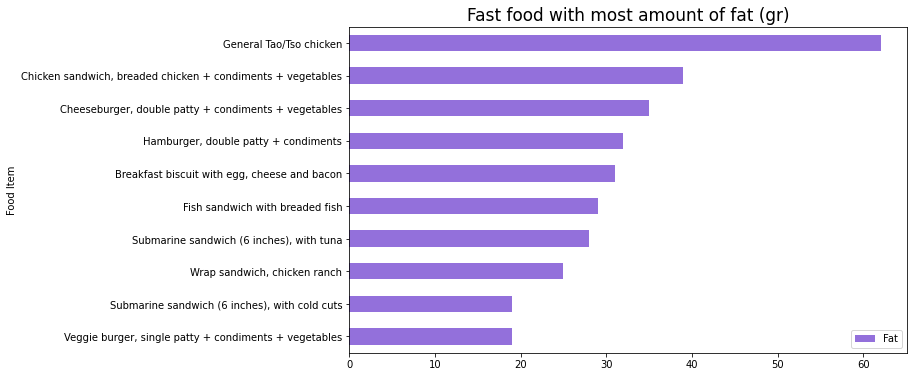

In [201]:
PVF.plot(kind='barh',
                     figsize=(10,6),
         color='mediumpurple')
plt.title('Fast food with most amount of fat (gr)', fontsize=17)

#Conclusion
As most people tend to prioritize fat over protein as a factor when deciding what to eat, utilizing a horizontal bar graph we can observe that between the fast foods under testing General Tao also known as Tso chicken is the food with the most grams of fat in them, 20 grams more than the next in line for the food with most amount of fat, Chicken sandwich; breaded chicken + condiments + vegetables.

# 4. How does the amount of fat and carbs on fast foods compare?

#Hypothesis
Again using the variables Category, Food Item, Fat and, Carbs and, by implementing a line graph we will be able to see how both the Fat and Carbs variables are related to the food item and to see if both the variables are related to each other so that we can answer the inital question "How does the amount of fat and carbs on fast foods compare?".

In [202]:
pv4=pd.pivot_table(index=['Category','Measure'],data=df,values= ['Fat','Carbs'],margins=True)
pv4

Carbs       Fat
Category    Measure                       
Baked Goods 1          28.687500  9.250000
            2          17.750000  4.800000
            1 piece    26.000000  4.000000
            1 slice    33.000000  6.000000
            1 square   23.750000  6.500000
...                          ...       ...
Vegetables  4 slices    1.000000       NaN
            4 sprouts   6.000000       NaN
            6 spears    3.000000  1.000000
            60mL        2.500000       NaN
All                    15.788486  7.113642

[183 rows x 2 columns]

Text(0.5, 1.0, 'Fast Foods Carbs vs Fats')

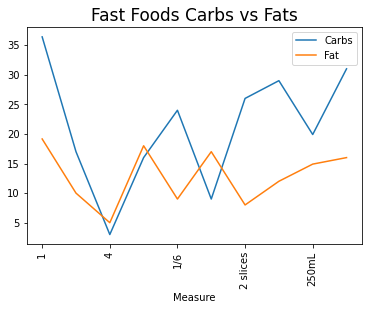

In [203]:
pv4.loc['Fast Foods'].plot(kind='line')
plt.legend()
plt.xticks(rotation=90)
plt.title('Fast Foods Carbs vs Fats',fontsize=17)

#Conclusion
There is no visual relation between the grams of fat and carbs with the different measures of the fast food. In fact sometimes the relation is directly proportional and sometimes tha opposite like in the case of the 2 slices.


#5. How are the macronutrients of Sweets conformed?

#Hypothesis

Thanks to the variables Category, Food Item, Fat, Protein, Fibre and, Carbs and by implementing an area chart it will be easy to visually recognize the macronutrients conforming Sweets and give you an aproximate representation of each.

In [213]:
x=pd.pivot_table(index='Category',data=df,values= ['Protein', 'Fat','Carbs','Fibre','Measure'],margins=True)
x.loc['Total']=x.sum()
x

,Carbs,Fat,Fibre,Protein
Category,,,,
Baked Goods,31.877778,9.625000,1.124444,3.077778
Beverages,16.630435,1.000000,0.060417,0.741935
Dairy,13.469136,3.225581,6.025974,6.987342
Eggs,7.222222,14.272727,NaN,12.818182
Fast Foods,28.146341,15.951220,1.792683,17.243902
Fats and Oils,1.344828,7.358974,NaN,0.125000
Fish,2.066667,4.254237,NaN,15.573770
Fruit,14.726027,4.000000,1.469863,0.980392
Grain/Cereal,24.371212,2.200000,2.290152,3.621212


In [214]:
x=x.loc['Sweets']/PVT.loc['Total']*100
x

Carbs      7.061254
Fat        5.075029
Fibre      2.106344
Protein    1.808452
dtype: float64

In [215]:
colors=['forestgreen', 'darkgreen','mediumseagreen','c']

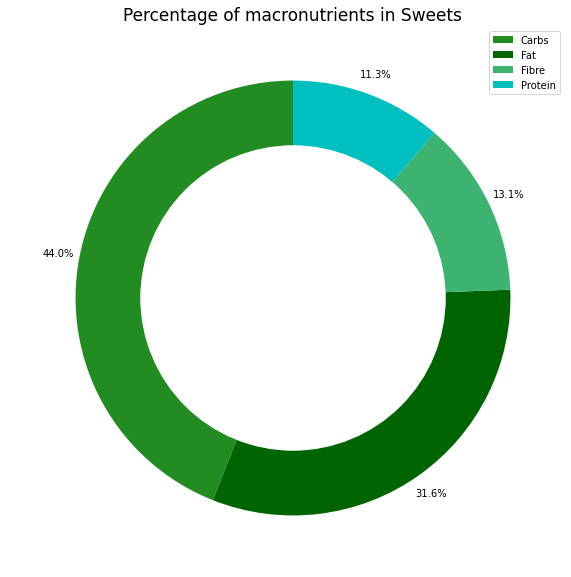

In [217]:

x.plot(kind='pie',
       labels=None,
       label=' ',
          stacked=False,
          figsize=(20,10),
        startangle=90,
                     autopct='%1.1f%%',
                     pctdistance=1.1,
       colors=colors)
plt.title('Macronutrients in different types of food',fontsize=17)
plt.legend(labels=PVT,bbox_to_anchor=(1,1.0))
plt.title('Percentage of macronutrients in Sweets', fontsize=17)
circle = plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(circle)

#Conclusion
We can appreciate visually that Sweets is mostly conformed of carbs and fats which is to be expected since that is basically what they are made of.

# 6. Is there any outliers in the characteristic carbs in the vegetables variable?


#Hypothesis

Using the variables Category, Carbs and by making a distinction for the specific Food Type, Vegetables and thanks to the boxplot graph it will be easy to identify the different outliers.

In [208]:
vc=df.loc[df['Category']=='Vegetables','Carbs'].to_frame()

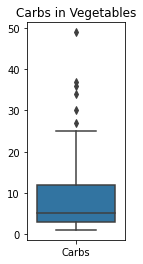

In [209]:
fig=plt.figure()
ax1=fig.add_subplot(1,3,1)
sns.boxplot(data=vc)

ax1.title.set_text('Carbs in Vegetables')

#Conclusion
We can answer that yes there is an outlier in the graph which translates into one meal having much more carbs than the rest, which could be because it is fried or cooked in a different way.


# 7. Which is the food that is the outlier in the carbs in vegetables boxplot?


#Hypothesis

Implementing a pivot table with the variables Category, Food Item and, Carbs in which then will sorted for just the food type Vegetables will give us a list of the amount of carbs in vegetables. If after this there is another sorting made from the most amount of carbs to the least it will give us a comprehensive list in which either the top of the bottom will be our outlier.

In [210]:
pv7=pd.pivot_table(index=[df['Category'],'Food Item'],data=df,values= 'Carbs',margins=True)
pv7

Carbs
Category    Food Item                                                    
Baked Goods Angelfood, commercial (25cm diam)                   16.000000
            Angelfood, from mix (25cm diam)                     29.000000
            Animal crackers (arrowroot, social tea)              7.000000
            Apple crisp, homemade                               39.000000
            Apple, commercial, 2 crust (23cm diam)              43.000000
...                                                                   ...
Vegetables  Vegetables, mixed (corn, lima beans, snap beans...  13.000000
            Vegetables, peas and carrots, canned, not drained   11.000000
            Zucchini, raw, slices                                1.000000
            Zucchini, sliced, boiled, drained                    4.000000
All                                                             14.926527

[1049 rows x 1 columns]

In [211]:
pv71=pv7.loc['Vegetables']
pv71

,Carbs
Food Item,
"Artichoke hearts, canned in water",3.0
"Artichoke hearts, marinated in oil",3.0
"Artichoke, boiled, drained",13.0
"Asparagus, canned, drained",3.0
"Asparagus, fresh or frozen, boiled, drained",3.0
...,...
"Vegetables, broccoli and cauliflower, frozen, boiled, drained",4.0
"Vegetables, mixed (corn, lima beans, snap beans, peas, carrots), frozen, boiled, drained",13.0
"Vegetables, peas and carrots, canned, not drained",11.0


In [212]:
pv71=pv71.sort_values('Carbs', ascending=False)
pv71

,Carbs
Food Item,
"Potato, microwaved, flesh and skin",49.0
"Potato, baked, flesh and skin",37.0
"Potato, microwaved, peeled after cooking",36.0
"Potato, baked, flesh",34.0
"Potato, boiled, flesh and skin",30.0
...,...
"Seaweed, dulse, dried",1.0
"Spinach, chopped, raw",1.0
"Pepper, jalapeno, raw",1.0


#Conclusion
As we can see in the pivot table, there is a really big difference between the vegetable with the least amount of carbs, snap beans, and the one with the biggest, picked beets, this already indicates that pickled beets is most likely going to be the outlier. Another indicator is that the seven vegetables that have the least amount of carbs sum up to 21 grams while the picked beets account for 20 grams, giving us the indication that again there is a very big difference between the data and make the pickled beets the outlier.

#Final conclusion
Thanks to this study I was able to identify that from the foods depicted in the data base, Fast Food is the one with the most fat and carbs, which is to be expected. Vegetables mainly are low carbs though the last three foods that are outliers and have almost as much carbs as the first 7 with the least amount of carbs. Also the second type of food with most carbs is Sweets and it is mainly conformed of carbs and fats.
